In [1]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
%matplotlib inline

In [3]:
import xgboost
from xgboost import XGBRegressor

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from tqdm import tqdm

In [5]:
from multicam.mah import get_mah

# Load data

In [6]:
mah_data = get_mah('../../data/processed/bolshoi_m12/', cutoff_missing=0.05, cutoff_particle=0.05)

In [7]:
# catalog
cat = mah_data['cat']
xoff = cat['x0']
cvir = cat['cvir']
ma = mah_data['ma']
am = mah_data['am']
# ma_peak = mah_data['ma_peak']

indices = mah_data['indices']
scales = mah_data['scales']
mass_bins = mah_data['mass_bins']
print(cvir.shape, xoff.shape, am.shape, ma.shape, scales.shape, mass_bins.shape)

(10000,) (10000,) (10000, 100) (10000, 165) (165,) (100,)


# Train xgboost to predict concentration

In [8]:
# subsample ma to reduce features every 10 
x = ma[:, ::10]
y = cvir[:, None]

In [9]:
# test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
model.fit(x_train, y_train, eval_metric='rmse', eval_set=[(x, y)], verbose=True, early_stopping_rounds=10)

In [13]:
y_pred = model.predict(x_test)

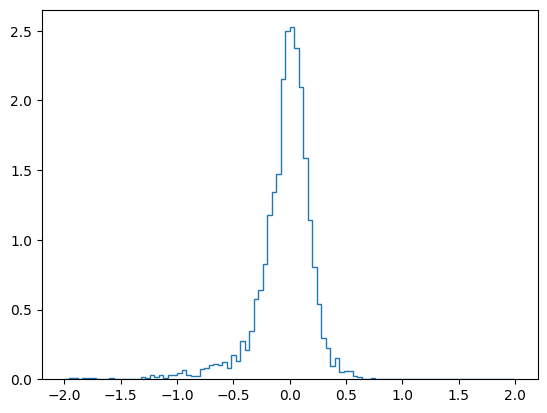

In [14]:
# evaluate by looking at histograms of residuals
res = (y_test[:, 0] - y_pred)/y_test[:, 0]
plt.hist(res, bins=100, range=(-2, 2), histtype='step', density=True, label='residuals');

In [15]:
from multicam.correlations import spearmanr
spearmanr(y_test[:, 0], y_pred)

0.8386479868318483

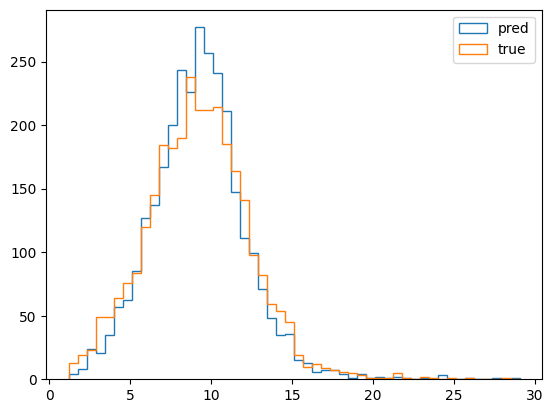

In [16]:
_, bins, _ = plt.hist(y_pred, histtype='step', bins=50, label='pred')
plt.hist(y_test[:, 0], bins=bins, histtype='step', label='true')
plt.legend()